# Classification Accuracy

In [1]:
import pandas as pd
#col_names = ['preagnant' ,'glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv(r"D:\python\scikitlearn-ML\CSV file\diabetes.csv")

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


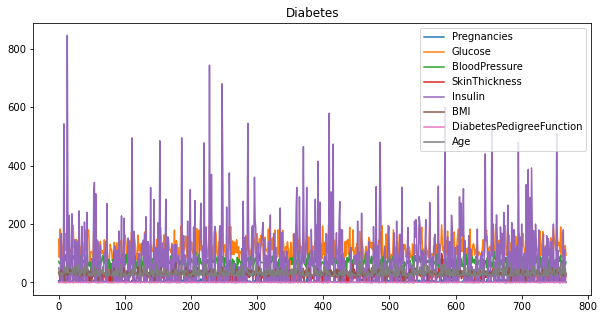

In [2]:
#features observation
pima.drop(['Outcome'],axis = 1).plot.line(figsize=(10,5),title='Diabetes')

In [3]:
X = pima[['Pregnancies','Insulin','BMI','Age']]
X.head()
y = pima.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [6]:
y_pred_class = logreg.predict(X_test)

# Classification Accuracy

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.6614583333333334


# Null accuracy : accuracy that could be achieved by predicting the most    frequent class

skewed classes from week 6

In [9]:
#examine the class distribution of testing set(using pandas series method)
y_test.value_counts()

0    132
1     60
Name: Outcome, dtype: int64

In [10]:
#percentage of having 1 , [60/(132 + 60)]
y_test.mean()

0.3125

In [11]:
#calculate percentage of 0
1 - y_test.mean()

0.6875

In [13]:
#calculate null accuracy for binary classification problem as 0/1
max(y_test.mean() , 1-y_test.mean())

0.6875

In [21]:
#it will only work if y_test is pandas series
#calculate null accuracy(for multiclass classification problem)
#here just only label 0 & 1, that's why head(2) , 2 labels
y_test.value_counts().head(2)/len(y_test)

0    0.6875
1    0.3125
Name: Outcome, dtype: float64

#comparaing the true & predicted response value

In [36]:
#can use y_test instead of y_test.values 
#here pred is found hardly 1 when y_test is actually 1
print('True:',y_test.values[0:25])
print('Pred:',y_pred_class[0:25])

True: [0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
Pred: [1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0]


# Confusion matrix

In [ ]:
print('True:',y_test.values[0:25])
print('Pred:',y_pred_class[0:25])

In [37]:
confusion = metrics.confusion_matrix(y_test , y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# Metrics computed from a confusion matrix

In [39]:
#situation when test & pred same
print((TP+TN)/(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test,y_pred_class))

0.6614583333333334
0.6614583333333334


In [41]:
#situation when test & pred not same
#classification error, misclassification rate
print((FP + FN)/(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test,y_pred_class))

0.3385416666666667
0.33854166666666663


#sensitivity : ( when actual value is positive , how often prediction is correct )
Recall

In [43]:
print(TP/(TP + FN))
print(metrics.recall_score(y_test , y_pred_class))

0.4166666666666667
0.4166666666666667


specify: (when actual is negative , how often pred is correct)
Precision

In [47]:

print(TP/(TP + FP))
print(metrics.precision_score(y_test , y_pred_class))

0.45454545454545453
0.45454545454545453


# Adjusting the classification threshold

In [48]:
logreg.predict(X_test)[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [51]:
#print the first 10 predicted probabilities for class membership
#1st column 0 , 2nd column 
logreg.predict_proba(X_test)[0:10,:]

array([[0.45741671, 0.54258329],
       [0.42759116, 0.57240884],
       [0.84701988, 0.15298012],
       [0.68692119, 0.31307881],
       [0.87484642, 0.12515358],
       [0.87424749, 0.12575251],
       [0.53696901, 0.46303099],
       [0.29112686, 0.70887314],
       [0.31095613, 0.68904387],
       [0.4891513 , 0.5108487 ]])

In [58]:
#print the first 10 predicted probabilities for class 1
 logreg.predict_proba(X_test)[0:10,1]

In [55]:
#print the first 10 predicted probabilities for class 0
logreg.predict_proba(X_test)[0:10,0]

array([0.45741671, 0.42759116, 0.84701988, 0.68692119, 0.87484642,
       0.87424749, 0.53696901, 0.29112686, 0.31095613, 0.4891513 ])

In [87]:
 y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [88]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

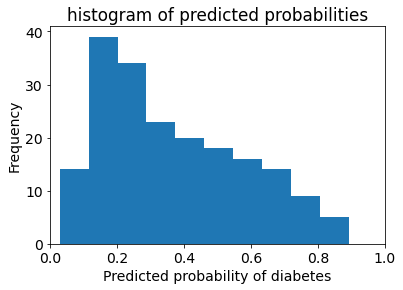

In [89]:
#histogram of predicted probabilities
plt.hist(y_pred_prob , bins = 10)
plt.xlim(0 , 1)
plt.title('histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# Decrease thershold for predicting diabetes in order to increase sensitivity of the classifier

In [146]:
#threshold sets at 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],0.3)[0]

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [140]:
y_pred_prob[0:10]

array([0.54258329, 0.57240884, 0.15298012, 0.31307881, 0.12515358,
       0.12575251, 0.46303099, 0.70887314, 0.68904387, 0.5108487 ])

In [141]:
y_pred_class[0:10]

array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1.])

In [142]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[102  30]
 [ 35  25]]


In [144]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test,y_pred_class))

[[76 56]
 [14 46]]


# ROC Curves and Area Under the Curve (AUC)
Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve!

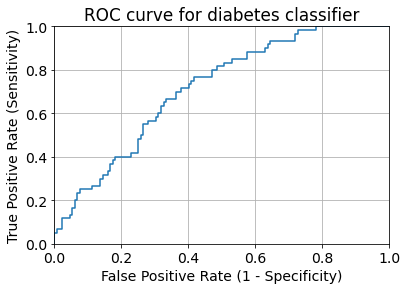

In [149]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr , tpr , thresholds = metrics.roc_curve(y_test ,y_pred_prob )
plt.plot(fpr , tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [160]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.00757576 0.00757576 0.02272727
 0.02272727 0.04545455 0.04545455 0.0530303  0.0530303  0.06060606
 0.06060606 0.06818182 0.06818182 0.07575758 0.07575758 0.11363636
 0.11363636 0.13636364 0.13636364 0.14393939 0.14393939 0.15909091
 0.15909091 0.16666667 0.16666667 0.17424242 0.17424242 0.18181818
 0.18181818 0.22727273 0.22727273 0.25       0.25       0.25757576
 0.25757576 0.26515152 0.26515152 0.28030303 0.28030303 0.3030303
 0.3030303  0.31060606 0.31060606 0.31818182 0.31818182 0.32575758
 0.32575758 0.33333333 0.33333333 0.36363636 0.36363636 0.37878788
 0.37878788 0.40151515 0.40151515 0.40909091 0.40909091 0.41666667
 0.41666667 0.46969697 0.46969697 0.48484848 0.48484848 0.50757576
 0.50757576 0.53030303 0.53030303 0.57575758 0.57575758 0.62878788
 0.62878788 0.63636364 0.63636364 0.64393939 0.64393939 0.71969697
 0.71969697 0.72727273 0.72727273 0.78030303 0.78030303 1.        ]
[0.         0.01666667 0.05       0.05       0.06666667 0.0666

In [165]:
# define a function that accepts a threshold and prints sensitivity and specificity
#print last value[-1]
#if thresholds<threshold then it is zero , otherwise 1 
def evaluate_threshold(threshold):
    print('Sensitivity:' , tpr[thresholds>threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [166]:
evaluate_threshold(0.5)

Sensitivity: 0.4166666666666667
Specificity: 0.7727272727272727


# AUC is the percentage of the ROC plot that is underneath the curve:
AUC is useful as a single number summary of classifier performance.
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
AUC is useful even when there is high class imbalance (unlike classification accuracy).


In [167]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test , y_pred_prob))

0.7131313131313131


In [169]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg , X, y , cv = 10, scoring='accuracy').mean()

0.6965994531784006